In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)
import seaborn as sn

In [2]:
train=pd.read_csv('E:\\DataScience\\Inceptez\\MAchinelearning\\Loan_Predict\\train_u6lujuX_CVtuZ9i.csv')
test=pd.read_csv('E:\\DataScience\\Inceptez\\MAchinelearning\\Loan_Predict\\test_Y3wMUE5_7gLdaTN.csv')

In [34]:
train['source']='Train'
test['source']='Test'

In [104]:
df_combine=pd.concat([train,test],axis=0,ignore_index=True)

In [105]:
df_combine['source'].value_counts()

Train    614
Test     367
Name: source, dtype: int64

In [107]:
df_combine.tail()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source
976,4009,1777.0,1.0,3+,Not Graduate,Male,113.0,360.0,LP002971,NaN,Yes,Urban,Yes,Test
977,4158,709.0,1.0,0,Graduate,Male,115.0,360.0,LP002975,NaN,Yes,Urban,No,Test
978,3250,1993.0,NaN,0,Graduate,Male,126.0,360.0,LP002980,NaN,No,Semiurban,No,Test
979,5000,2393.0,1.0,0,Graduate,Male,158.0,360.0,LP002986,NaN,Yes,Rural,No,Test
980,9200,0.0,1.0,0,Graduate,Male,98.0,180.0,LP002989,NaN,No,Rural,Yes,Test


In [108]:
df_combine['Gender']=df_combine.groupby(['Education','Property_Area'])['Gender'].transform(lambda x:x.fillna(x.mode()[0]))

In [6]:
train.iloc[104]

Loan_ID              LP001357
Gender                   Male
Married                   NaN
Dependents                NaN
Education            Graduate
Self_Employed              No
ApplicantIncome          3816
CoapplicantIncome         754
LoanAmount                160
Loan_Amount_Term          360
Credit_History              1
Property_Area           Urban
Loan_Status                 Y
Name: 104, dtype: object

In [7]:
train[train.Married.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [109]:
condition=(df_combine['ApplicantIncome']>0)&(df_combine['CoapplicantIncome'] >0 ) 

In [110]:
condition2=(df_combine['Married'].isnull())

In [111]:
criteria = condition & condition2

In [112]:
df_combine.loc[criteria,'Married']='Yes'

In [113]:
df_combine['Married'].fillna('No',inplace=True)

In [114]:
train[train.Dependents.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source


In [14]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [115]:
df_combine['Dependents']=df_combine.groupby(['Gender','Married','Education','Property_Area'])['Dependents'].transform(lambda x:x.fillna(x.mode()[0]))

In [116]:
df_combine['Self_Employed']=df_combine.groupby(['Gender','Married','Education','Property_Area' ])['Self_Employed'].transform(lambda x:x.fillna(x.mode()[0]))

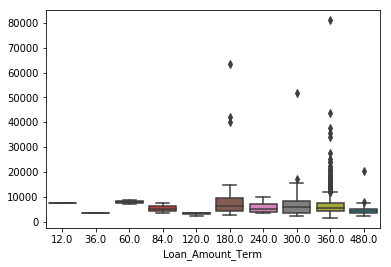

In [17]:
sn.boxplot(train['Loan_Amount_Term'],(train['ApplicantIncome']+train['CoapplicantIncome']))

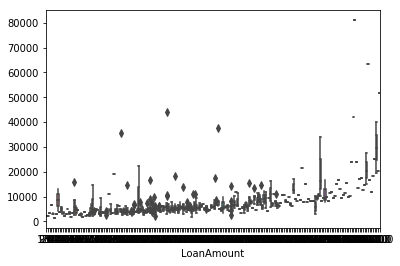

In [18]:
sn.boxplot(train['LoanAmount'],(train['ApplicantIncome']+train['CoapplicantIncome']))

In [54]:
df_combine.describe(include="all")

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source
count,981.000000,981.000000,952.000000,981,981,981,976.000000,975.000000,981,614,981,981,981,981
unique,NaN,NaN,NaN,4,2,2,NaN,NaN,981,2,2,3,2,2
top,NaN,NaN,NaN,0,Graduate,Male,NaN,NaN,LP001536,Y,Yes,Semiurban,No,Train
freq,NaN,NaN,NaN,570,763,799,NaN,NaN,1,422,632,349,862,614
mean,5179.795107,1601.916330,0.842437,NaN,NaN,NaN,142.138832,342.457436,NaN,NaN,NaN,NaN,NaN,NaN
std,5695.104533,2718.772806,0.364522,NaN,NaN,NaN,76.616172,64.665749,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,NaN,NaN,NaN,9.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2875.000000,0.000000,1.000000,NaN,NaN,NaN,100.000000,360.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,3800.000000,1110.000000,1.000000,NaN,NaN,NaN,126.000000,360.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,5516.000000,2365.000000,1.000000,NaN,NaN,NaN,160.000000,360.000000,NaN,NaN,NaN,NaN,NaN,NaN


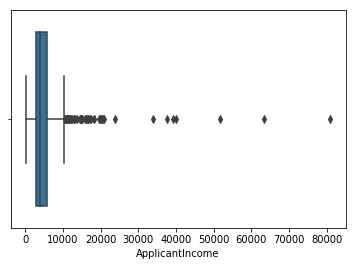

In [20]:
sn.boxplot(train['ApplicantIncome'])

In [21]:
train.query('CoapplicantIncome<=0')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
15,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
18,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
25,LP001066,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y
28,LP001086,Male,No,0,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,N


In [56]:
df_combine['ApplicantIncome'].mean()

5179.795107033639

In [61]:
df_combine.Property_Area.value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [117]:
df_combine["LoanAmount"]=df_combine.groupby(['Education','Property_Area','Gender','Married'])['LoanAmount'].transform(lambda x: x.fillna(x.mean()))

In [118]:
df_combine["Loan_Amount_Term"]=df_combine.groupby(['Education','Property_Area','Gender','Married'])['Loan_Amount_Term'].transform(lambda x: x.fillna(x.mean()))

In [119]:
df_combine["Credit_History"]=df_combine.groupby(['Education','Property_Area','Gender','Married'])['Credit_History'].transform(lambda x: x.fillna(x.mean()))

In [120]:
categorialcolumn=[i  for i in df_combine.columns if train[i].dtype=="object" and i not in ('Loan_ID','Loan_Status','source')]
categorialcolumn

['Dependents',
 'Education',
 'Gender',
 'Married',
 'Property_Area',
 'Self_Employed']

In [121]:
df_cat=pd.get_dummies(df_combine[categorialcolumn])

In [122]:
numericalcolumn=[i  for i in df_combine.columns if df_combine[i].dtype!="object" and i not in ('Loan_ID','Loan_Status')]
numericalcolumn

['ApplicantIncome',
 'CoapplicantIncome',
 'Credit_History',
 'LoanAmount',
 'Loan_Amount_Term']

In [123]:

scaler =RobustScaler().fit(df_combine[

['ApplicantIncome',
 'CoapplicantIncome',
 'Credit_History',
 'LoanAmount',
 'Loan_Amount_Term']
])


In [124]:
df_num=scaler.transform(df_combine[

['ApplicantIncome',
 'CoapplicantIncome',
 'Credit_History',
 'LoanAmount',
 'Loan_Amount_Term']
])

In [125]:
df_num1=pd.DataFrame(df_num,columns=['ApplicantIncome',
 'CoapplicantIncome',
 'Credit_History',
 'LoanAmount',
 'Loan_Amount_Term']
)


In [126]:
source=df_combine['source']
source.shape


(981,)

In [127]:
df_cat.shape

(981, 15)

In [128]:
df_num1.shape

(981, 5)

In [141]:
df=pd.concat([df_cat,df_num1,source,df_combine['Loan_Status']],axis=1)

In [150]:
pretrain=df[df['source']=='Train']

In [165]:
pretrain.columns

Index(['Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Self_Employed_No',
       'Self_Employed_Yes', 'ApplicantIncome', 'CoapplicantIncome',
       'Credit_History', 'LoanAmount', 'Loan_Amount_Term', 'source',
       'Loan_Status'],
      dtype='object')

In [151]:
y=pretrain['Loan_Status']

In [152]:
X=pretrain.drop(columns=['Loan_Status','source'])

In [153]:
# Train & Test split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state=42)

In [167]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('Accuracy score baseline:', accuracy_score(y_test, y_pred))

Accuracy score baseline: 0.7783783783783784


In [168]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.6594594594594595


In [173]:
# Adaboost Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
 

model = RandomForestClassifier(criterion='gini',max_depth=4,max_features=0.5,random_state=42)

lrmodel= LogisticRegression()
#dtree = DecisionTreeClassifier(criterion='gini',max_depth=2)

adabst_fit = AdaBoostClassifier(base_estimator= model,        n_estimators=22,learning_rate=0.05,random_state=42)


#adabst_fit = AdaBoostClassifier(base_estimator= lrmodel,        n_estimators=22,learning_rate=0.05,random_state=42)

adabst_fit.fit(x_train, y_train)

print ("\nAdaBoost - Train Confusion Matrix\n\n",pd.crosstab(y_train,adabst_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nAdaBoost  - Train accuracy",round(accuracy_score(y_train,adabst_fit.predict(x_train)),3))
print ("\nAdaBoost  - Train Classification Report\n",classification_report(y_train,adabst_fit.predict(x_train)))

print ("\n\nAdaBoost  - Test Confusion Matrix\n\n",pd.crosstab(y_test,adabst_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nAdaBoost  - Test accuracy",round(accuracy_score(y_test,adabst_fit.predict(x_test)),3))
print ("\nAdaBoost - Test Classification Report\n",classification_report(y_test,adabst_fit.predict(x_test)))


AdaBoost - Train Confusion Matrix

 Predicted   N    Y
Actuall           
N          56   71
Y           5  297

AdaBoost  - Train accuracy 0.823

AdaBoost  - Train Classification Report
              precision    recall  f1-score   support

          N       0.92      0.44      0.60       127
          Y       0.81      0.98      0.89       302

avg / total       0.84      0.82      0.80       429



AdaBoost  - Test Confusion Matrix

 Predicted   N    Y
Actuall           
N          27   38
Y           3  117

AdaBoost  - Test accuracy 0.778

AdaBoost - Test Classification Report
              precision    recall  f1-score   support

          N       0.90      0.42      0.57        65
          Y       0.75      0.97      0.85       120

avg / total       0.81      0.78      0.75       185



In [171]:
# Xgboost Classifier
import xgboost as xgb

xgb_fit = xgb.XGBClassifier(max_depth=2, n_estimators=5000, learning_rate=0.05)
xgb_fit.fit(x_train, y_train)

print ("\nXGBoost - Train Confusion Matrix\n\n",pd.crosstab(y_train,xgb_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nXGBoost - Train accuracy",round(accuracy_score(y_train,xgb_fit.predict(x_train)),3))
print ("\nXGBoost  - Train Classification Report\n",classification_report(y_train,xgb_fit.predict(x_train)))

print ("\n\nXGBoost - Test Confusion Matrix\n\n",pd.crosstab(y_test,xgb_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nXGBoost - Test accuracy",round(accuracy_score(y_test,xgb_fit.predict(x_test)),3))
print ("\nXGBoost - Test Classification Report\n",classification_report(y_test,xgb_fit.predict(x_test)))



XGBoost - Train Confusion Matrix

 Predicted    N    Y
Actuall            
N          127    0
Y            0  302

XGBoost - Train accuracy 1.0

XGBoost  - Train Classification Report
              precision    recall  f1-score   support

          N       1.00      1.00      1.00       127
          Y       1.00      1.00      1.00       302

avg / total       1.00      1.00      1.00       429



XGBoost - Test Confusion Matrix

 Predicted   N    Y
Actuall           
N          33   32
Y          11  109

XGBoost - Test accuracy 0.768

XGBoost - Test Classification Report
              precision    recall  f1-score   support

          N       0.75      0.51      0.61        65
          Y       0.77      0.91      0.84       120

avg / total       0.76      0.77      0.75       185



In [182]:
#Ensemble of Ensembles - by fitting various classifiers
clwght = {'Y':0.5,'N':0.5}

# Classifier 1
from sklearn.linear_model import LogisticRegression
clf1_logreg_fit = LogisticRegression(fit_intercept=True,class_weight=clwght)
clf1_logreg_fit.fit(x_train,y_train)

print ("\nLogistic Regression for Ensemble - Train Confusion Matrix\n\n",pd.crosstab(y_train,clf1_logreg_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nLogistic Regression for Ensemble - Train accuracy",round(accuracy_score(y_train,clf1_logreg_fit.predict(x_train)),3))
print ("\nLogistic Regression for Ensemble - Train Classification Report\n",classification_report(y_train,clf1_logreg_fit.predict(x_train)))

print ("\n\nLogistic Regression for Ensemble - Test Confusion Matrix\n\n",pd.crosstab(y_test,clf1_logreg_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))      
print ("\nLogistic Regression for Ensemble - Test accuracy",round(accuracy_score(y_test,clf1_logreg_fit.predict(x_test)),3))
print ("\nLogistic Regression for Ensemble - Test Classification Report\n",classification_report(y_test,clf1_logreg_fit.predict(x_test)))



Logistic Regression for Ensemble - Train Confusion Matrix

 Predicted   N    Y
Actuall           
N          55   72
Y           6  296

Logistic Regression for Ensemble - Train accuracy 0.818

Logistic Regression for Ensemble - Train Classification Report
              precision    recall  f1-score   support

          N       0.90      0.43      0.59       127
          Y       0.80      0.98      0.88       302

avg / total       0.83      0.82      0.80       429



Logistic Regression for Ensemble - Test Confusion Matrix

 Predicted   N    Y
Actuall           
N          27   38
Y           3  117

Logistic Regression for Ensemble - Test accuracy 0.778

Logistic Regression for Ensemble - Test Classification Report
              precision    recall  f1-score   support

          N       0.90      0.42      0.57        65
          Y       0.75      0.97      0.85       120

avg / total       0.81      0.78      0.75       185

